In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

(1797, 64)


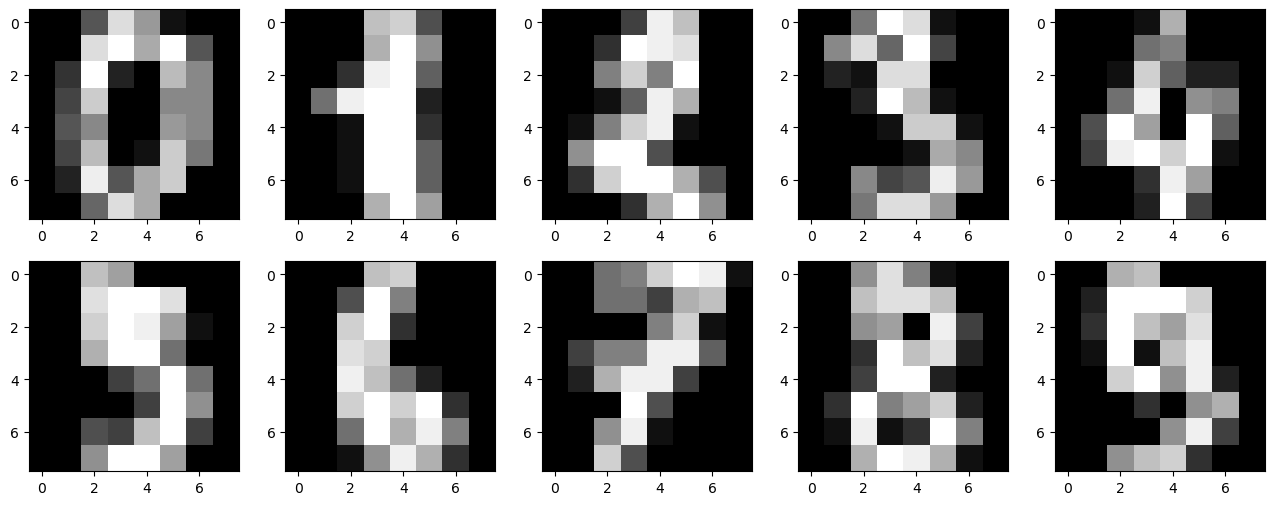

In [2]:
X, y = load_digits(return_X_y=True)
print(X.shape)


plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]), cmap='gray')

In [3]:
y.shape

(1797,)

In [4]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [7]:
# вычисление сигмоид функции
def sigmoid(x):
    x = np.clip(x, a_min=-500, a_max=500)
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [8]:
#  тренировка нейронной сети
def train_nn(X, y, num_iters):
    global weights
    for n_iter in range(num_iters):
        # проход данных через нейрон
        output = run_nn(X)

        # вычисление ошибки через обратное распространение back-propagation
        error = output - y
        
        # выполнение корректировки весов
        grad = np.dot(X.T, error * sigmoid_deriv(output))

        weights -= 0.01 * grad
        
        
        error = np.mean(np.abs(error))
        errors.append(error)
        
        # получение метрики качества
        preds = np.argmax(output, axis=1)
        labels = np.argmax(y, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

# пропускание входных данных через нейрон и получение предсказания
# конвертация значений во floats
def run_nn(inputs):
    global weights
    inputs = inputs.astype(float)
    output = sigmoid(np.dot(inputs, weights))
    return output

In [9]:
# генерации случайных чисел для инициализации весов
np.random.seed(1)
weights = np.random.random((X_train.shape[1], 10))
errors = []
metrics = []

In [10]:
weights.size

640

In [11]:
epochs = 20
train_nn(X_train, y_train, epochs)

Предсказание нейронной сети: 
6


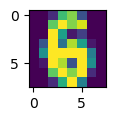

In [12]:
ind = np.random.randint(0, X_test.shape[0])
test_img = X_test[ind]
plt.figure(figsize=(1, 1))
plt.imshow(test_img.reshape([8,8]))

print("Предсказание нейронной сети: ")
print(np.argmax(run_nn(X_test[ind])))

In [13]:
run_nn(X_test[ind])

array([0.01286028, 0.00304575, 0.001014  , 0.00109705, 0.02295455,
       0.0033937 , 0.08190085, 0.0012304 , 0.00355462, 0.0014798 ])

In [14]:
test_preds = np.argmax(run_nn(X_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

test_accuracy = (test_preds == test_labels).sum() * 100 / len(test_labels)
print(f'Accuracy на тесте {test_accuracy:.2f}%')

Accuracy на тесте 86.36%


Домашнее задание Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [15]:
neuron_numb =  5

np.random.seed(1)

w0 = np.random.random((64, neuron_numb))
w1 = np.random.random((neuron_numb, 10))

learning_rate = 0.1

num_epochs = 100

errors = []
metrics =[]


for i in range(num_epochs):
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = sigmoid(np.dot(layer1, w1))

  layer2_error = layer2 - y_train
  layer2_grad = layer2_error * sigmoid_deriv(layer2)

  layer1_error = layer2_grad.dot(w1.T)
  layer1_grad = layer1_error * sigmoid_deriv(layer1)

  w1 -= layer1.T.dot(layer2_grad) * learning_rate
  w0 -= layer0.T.dot(layer1_grad) * learning_rate

  error = np.mean(np.abs(layer2_error))
  errors.append(error)

  preds = np.argmax(layer2, axis=1)
  labels = np.argmax(y_train, axis=1)
  accuracy = (preds == labels).sum() * 100 / len(labels)
  metrics.append(accuracy)


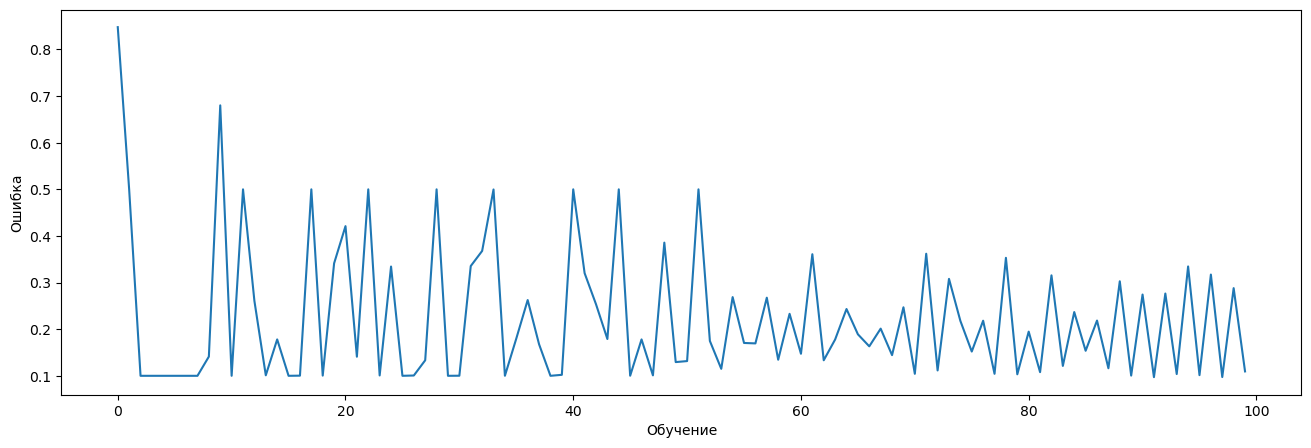

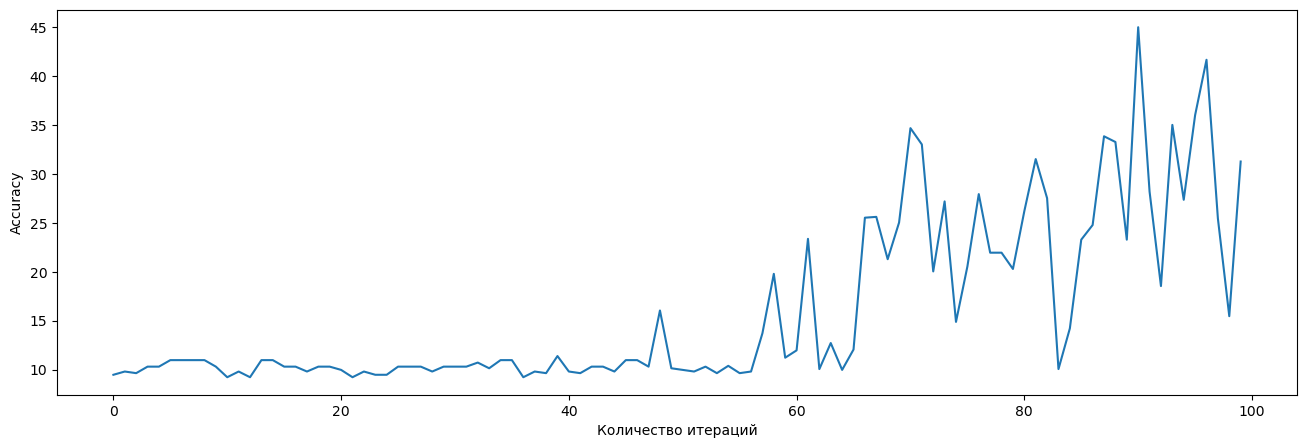

In [16]:
plt.figure(figsize=(16, 5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show()

plt.figure(figsize=(16, 5))
plt.plot(metrics)
plt.xlabel('Количество итераций')
plt.ylabel('Accuracy')
plt.show()

In [17]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

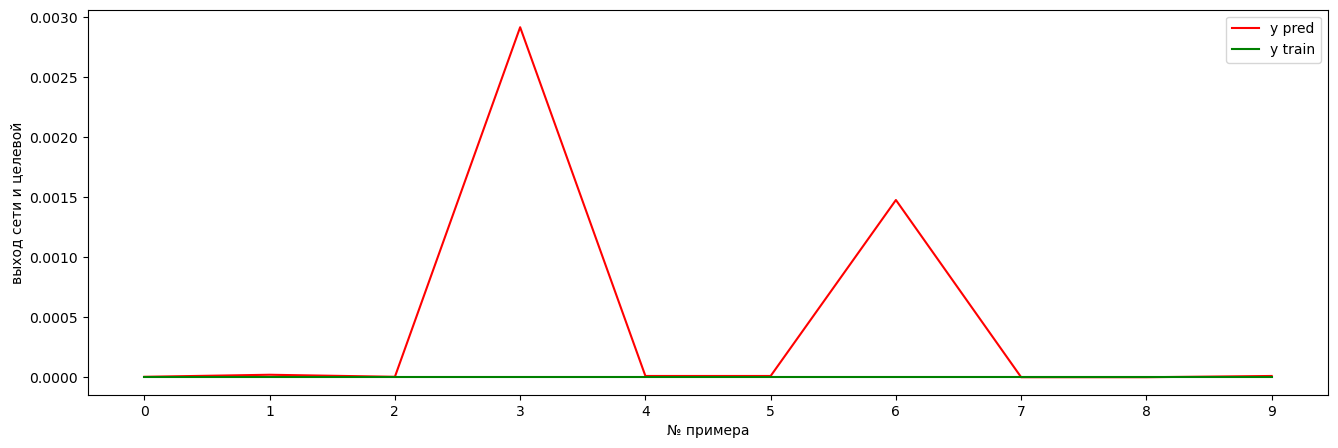

accuracy на обучении 31.26%


In [18]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

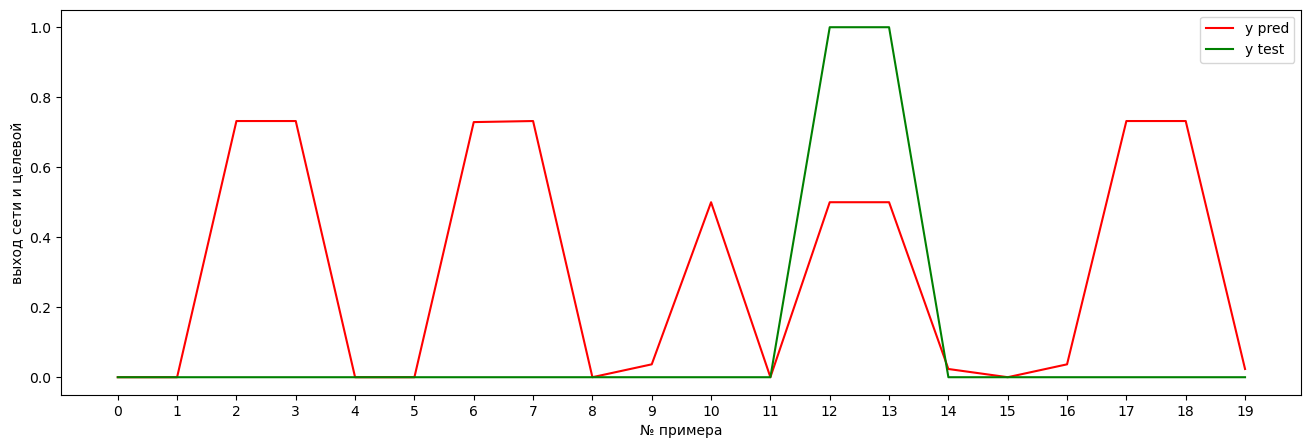

accuracy на тесте 21.72%


In [19]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

In [20]:
neuron_numb =  10

np.random.seed(1)

w0 = np.random.random((64, neuron_numb))
w1 = np.random.random((neuron_numb, 10))

learning_rate = 0.2

num_epochs = 200

errors = []
metrics =[]


for i in range(num_epochs):
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = sigmoid(np.dot(layer1, w1))

  layer2_error = layer2 - y_train
  layer2_grad = layer2_error * sigmoid_deriv(layer2)

  layer1_error = layer2_grad.dot(w1.T)
  layer1_grad = layer1_error * sigmoid_deriv(layer1)

  w1 -= layer1.T.dot(layer2_grad) * learning_rate
  w0 -= layer0.T.dot(layer1_grad) * learning_rate

  error = np.mean(np.abs(layer2_error))
  errors.append(error)

  preds = np.argmax(layer2, axis=1)
  labels = np.argmax(y_train, axis=1)
  accuracy = (preds == labels).sum() * 100 / len(labels)
  metrics.append(accuracy)

In [21]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

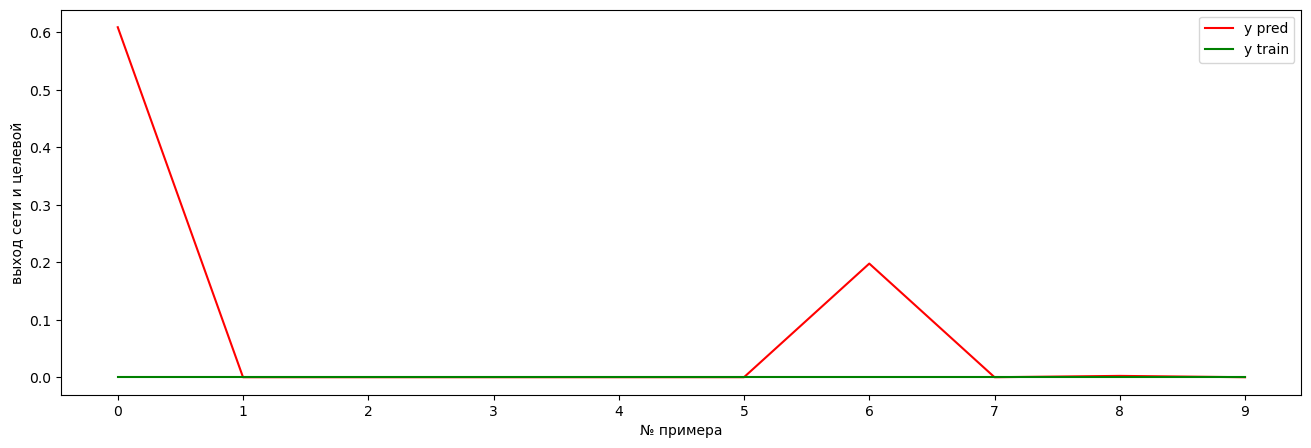

accuracy на обучении 80.13%


In [22]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

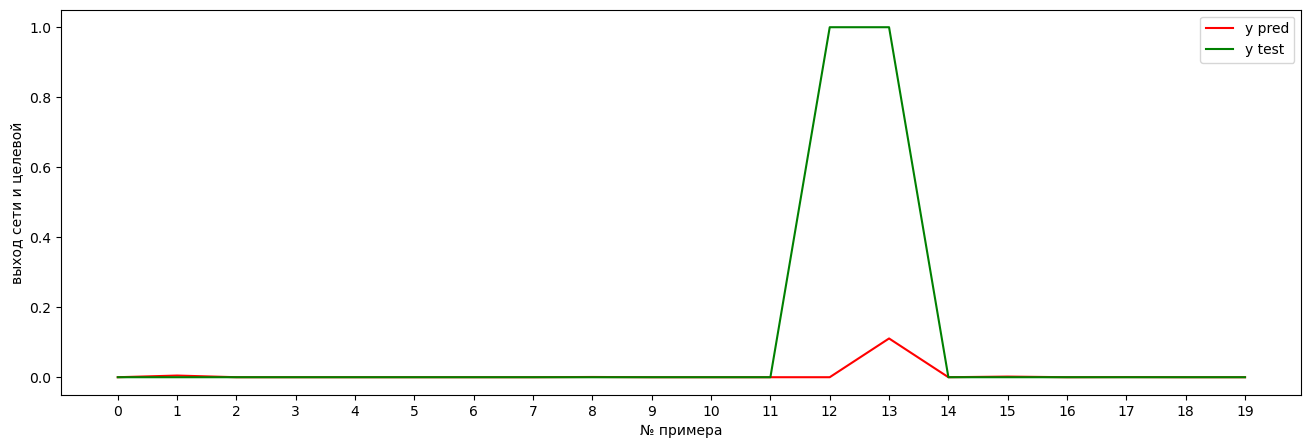

accuracy на тесте 77.27%


In [23]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

In [24]:
neuron_numb =  40

np.random.seed(1)

w0 = np.random.random((64, neuron_numb))
w1 = np.random.random((neuron_numb, 10))

learning_rate = 0.01

num_epochs = 1000

errors = []
metrics =[]


for i in range(num_epochs):
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = sigmoid(np.dot(layer1, w1))

  layer2_error = layer2 - y_train
  layer2_grad = layer2_error * sigmoid_deriv(layer2)

  layer1_error = layer2_grad.dot(w1.T)
  layer1_grad = layer1_error * sigmoid_deriv(layer1)

  w1 -= layer1.T.dot(layer2_grad) * learning_rate
  w0 -= layer0.T.dot(layer1_grad) * learning_rate

  error = np.mean(np.abs(layer2_error))
  errors.append(error)

  preds = np.argmax(layer2, axis=1)
  labels = np.argmax(y_train, axis=1)
  accuracy = (preds == labels).sum() * 100 / len(labels)
  metrics.append(accuracy)

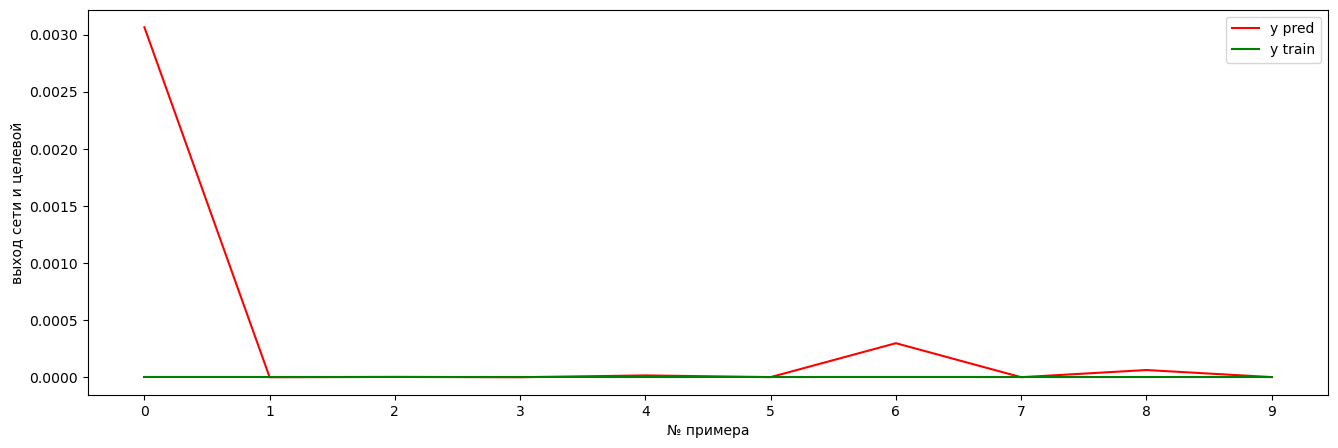

accuracy на обучении 99.92%


In [25]:
N = 10
label = 2
plt.figure(figsize=(16, 5))
plt.plot(layer2[:N, label], 'r', label='y pred')
plt.plot(y_train[:N, label],'g', label='y train')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()
        
print(f"accuracy на обучении {accuracy:.2f}%")

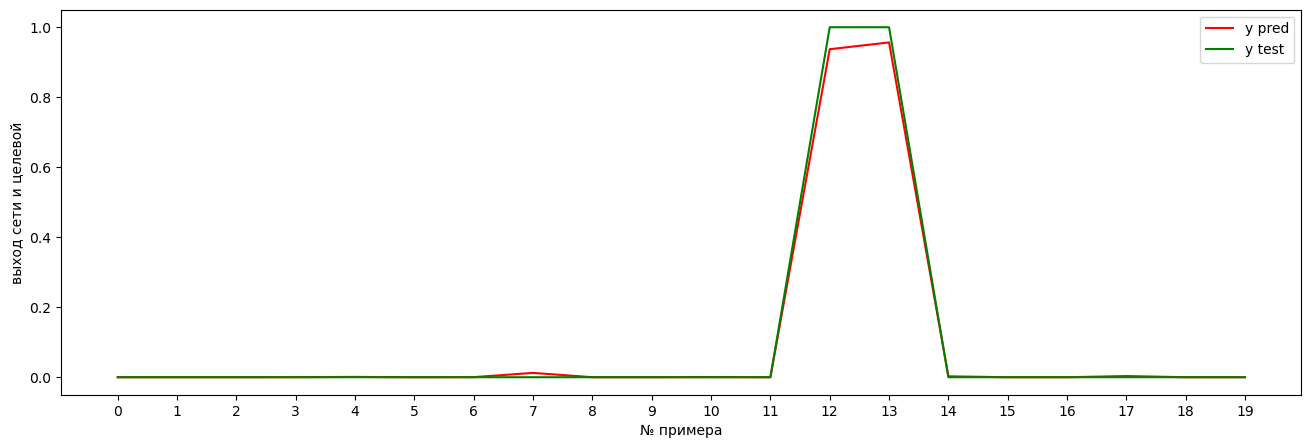

accuracy на тесте 96.13%


In [26]:
layer0_test = X_test
layer1_test = sigmoid(np.dot(layer0_test, w0))
layer2_test = sigmoid(np.dot(layer1_test, w1))
    
    
N = 20
plt.figure(figsize=(16, 5))
plt.plot(layer2_test[:N, 1], 'r', label='y pred')
plt.plot(y_test[:N, 1], 'g', label='y test')
plt.xticks(np.arange(N))
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend()
plt.show()

# метрика модели
preds_test = np.argmax(layer2_test, axis=1)
labels_test = np.argmax(y_test, axis=1)
accuracy_test = (preds_test == labels_test).sum() * 100 / len(labels_test)

print(f"accuracy на тесте {accuracy_test:.2f}%")

Увеличение количества нейронов в обучении, увеличении количества эпох, уменьшение learning_rate все эти изменения помогают получить лучше accuracy и наоборот все ведет  к ухудшению